In [11]:
import pandas as pd

iris_data = pd.read_csv('Iris.csv')
iris_data = iris_data.drop(['Id'], axis=1)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
iris_data.describe() # 查看數據分布

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


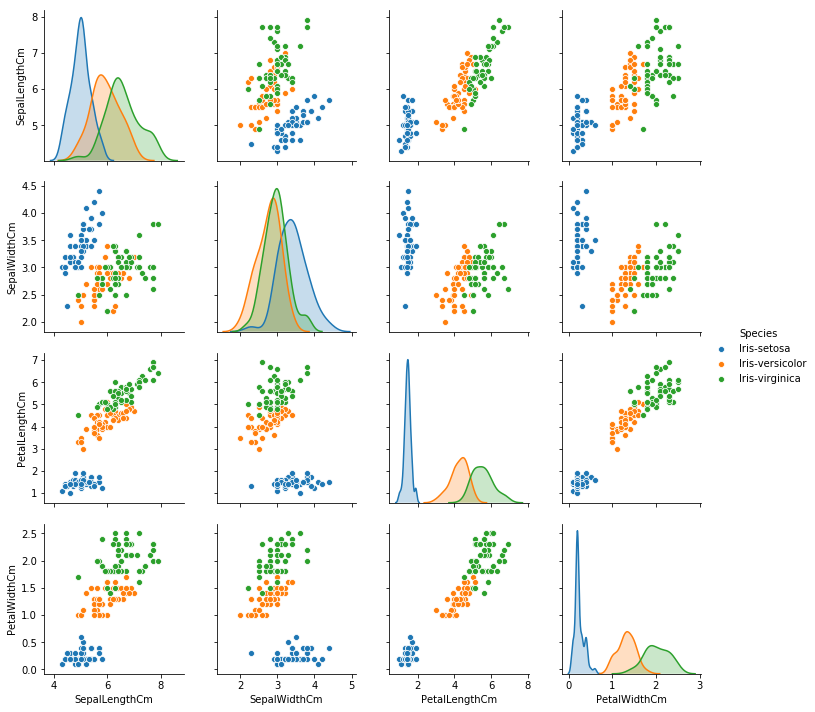

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

sb.pairplot(iris_data.dropna(),hue='Species') #特徵值和特徵值的關係圖，不能有缺失值

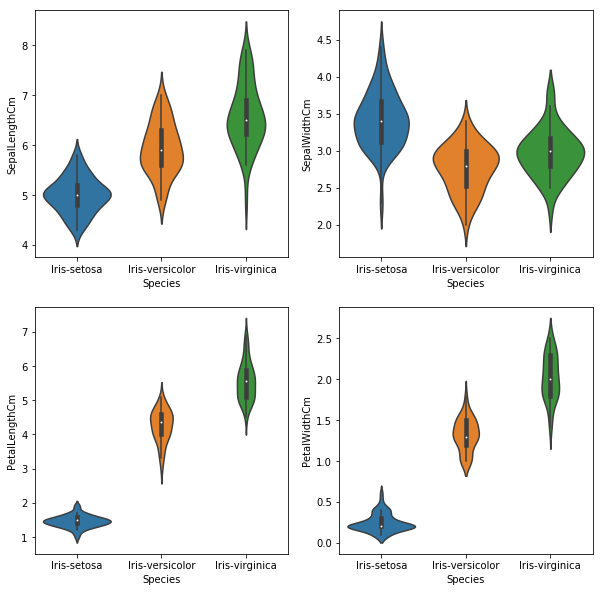

In [17]:
plt.figure(figsize=(10,10))
for column_index, column in enumerate(iris_data.columns):     ##　enumerate 數據產生索引系列
    if column == 'Species':   ## 作特徵 種類先去除
        continue
    plt.subplot(2,2,column_index+1)
    sb.violinplot(x='Species',y=column,data=iris_data)  ## violinplot 三種類別鳶尾花當前特徵分布是長怎樣

In [24]:
## 交叉驗證
from sklearn.cross_validation import train_test_split

all_input = iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

all_classes = iris_data['Species'].values

(training_inputs,testing_input,training_classes,testing_classes) = train_test_split(all_input, all_classes, train_size=0.75, random_state=1)

In [25]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier.fit(training_inputs,training_classes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
Ans = decision_tree_classifier.predict(testing_input)

In [27]:
Ans

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa'],
      dtype=object)

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(testing_classes,Ans)

0.9736842105263158

In [5]:
def  multipliers () :   
    return [ lambda x : i * x for i in range( 4 )]  
  
print [multipliers(3)]  

TypeError: multipliers() takes 0 positional arguments but 1 was given